In [1]:
# We check the CMIP6 snow data availability
from climaf.api import *

('LC debug :', False)
CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_1.2.12
python => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:


CliMAF version = 1.2.12


ncl 6.6.2 => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncdump
---


Cache directory set to : /data/mlalande/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/mlalande/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


In [2]:
first_year=2005
last_year=2014
period_extract=str(first_year)+'-'+str(last_year)
figure_type='.png'
figure_type2='.ps'
period_extract

'2005-2014'

In [3]:
# IPSL 31 members, that should be done only for Northern hemisphere
req_snow = ds(project='CMIP6', model='IPSL-CM6A-LR',
              variable='snc', table="LImon",frequency='monthly',realization='*',
               period=period_extract,experiment='historical',domain=[25,90,-180,180])

In [4]:
req_snow.explore('choices')

{'grid': 'gr',
 'institute': 'IPSL',
 'mip': 'CMIP',
 'realization': ['r10i1p1f1',
  'r11i1p1f1',
  'r12i1p1f1',
  'r13i1p1f1',
  'r14i1p1f1',
  'r15i1p1f1',
  'r16i1p1f1',
  'r17i1p1f1',
  'r18i1p1f1',
  'r19i1p1f1',
  'r1i1p1f1',
  'r20i1p1f1',
  'r21i1p1f1',
  'r22i1p1f1',
  'r23i1p1f1',
  'r24i1p1f1',
  'r25i1p1f1',
  'r26i1p1f1',
  'r27i1p1f1',
  'r28i1p1f1',
  'r29i1p1f1',
  'r2i1p1f1',
  'r30i1p1f1',
  'r31i1p1f1',
  'r32i1p1f1',
  'r3i1p1f1',
  'r4i1p1f1',
  'r5i1p1f1',
  'r6i1p1f1',
  'r7i1p1f1',
  'r8i1p1f1',
  'r9i1p1f1']}

In [5]:
ens_snow = req_snow.explore('ensemble')

In [6]:
summary(ens_snow)

Keys - values:
{'domain': [25, 90, -180, 180], 'version': 'latest', 'institute': 'IPSL', 'realization': 'r10i1p1f1', 'period': 2005-2014, 'simulation': '', 'project': 'CMIP6', 'experiment': 'historical', 'grid': 'gr', 'table': 'LImon', 'variable': 'snc', 'mip': 'CMIP', 'model': 'IPSL-CM6A-LR', 'root': '/bdd'}
-- Ensemble members:
r10i1p1f1
/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r10i1p1f1/LImon/snc/gr/latest/snc_LImon_IPSL-CM6A-LR_historical_r10i1p1f1_gr_185001-201412.nc
--
r11i1p1f1
/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r11i1p1f1/LImon/snc/gr/latest/snc_LImon_IPSL-CM6A-LR_historical_r11i1p1f1_gr_185001-201412.nc
--
r12i1p1f1
/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r12i1p1f1/LImon/snc/gr/latest/snc_LImon_IPSL-CM6A-LR_historical_r12i1p1f1_gr_185001-201412.nc
--
r13i1p1f1
/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r13i1p1f1/LImon/snc/gr/latest/snc_LImon_IPSL-CM6A-LR_historical_r13i1p1f1_gr_185001-201412.nc
--
r14i1p1f1
/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r14i1

In [7]:
ncdump(ens_snow)

netcdf \1 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf c {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descript

netcdf \8 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf \6 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf \0 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf \6 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf f {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descript

netcdf b {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descript

netcdf \8 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf \1 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf \2 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf d {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descript

netcdf \9 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

netcdf a {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descript

netcdf c {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descript

netcdf \8 {
dimensions:
	time = UNLIMITED ; // (120 currently)
	bnds = 2 ;
	lon = 144 ;
	lat = 52 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "Time axis" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(lon) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
	float lat(lat) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
	float snc(time, lat, lon) ;
		snc:standard_name = "surface_snow_area_fraction" ;
		snc:long_name = "Snow Area Fraction" ;
		snc:units = "%" ;
		snc:_FillValue = 1.e+20f ;
		snc:missing_value = 1.e+20f ;
		snc:online_operation = "average" ;
		snc:cell_methods = "area: time: mean" ;
		snc:interval_operation = "900 s" ;
		snc:interval_write = "1 month" ;
		snc:descrip

cens({'r10i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r10i1p1f1%gr%latest')),'r11i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r11i1p1f1%gr%latest')),'r12i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r12i1p1f1%gr%latest')),'r13i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r13i1p1f1%gr%latest')),'r14i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r14i1p1f1%gr%latest')),'r15i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r15i1p1f1%gr%latest')),'r16i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%IPSL-CM6A-LR%IPSL%CMIP%LImon%historical%r16i1p1f1%gr%latest')),'r17i1p1f1':ncdump(ds('CMIP6%%snc%2005-2014%[25, 90, -180, 180]%/bdd%I

In [6]:
# Define a CDO function
cscript("ensavg","cdo ensavg ${mmin} ${out}")

CliMAF operator : ensavg

In [7]:
# Check the data producing a map with CLIMAF
MAM_ens_cmip6 = clim_average(ens_snow,'MAM')
ens_avg_snow=ensavg(MAM_ens_cmip6)
reduced_map=llbox(ens_avg_snow, lonmin=-180, lonmax=180, latmin=20, latmax=90)

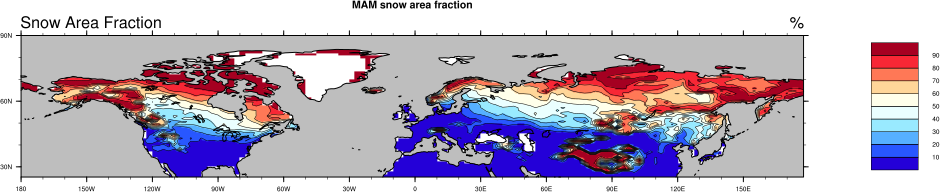

In [8]:
pp = dict(focus='land', contours=1,title='MAM snow area fraction')
myplot = plot(reduced_map,**pp)
iplot(myplot)

In [10]:
cerr()

In [11]:
# Check the type of climaf data
type(req_snow), type(ens_snow), type(reduced_map), type(plot(reduced_map,**pp))

(instance, climaf.classes.cens, instance, instance)

In [9]:
# We import standard python libraries, in particular because we are not using only CLIMAF
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy import stats
#Activate plots visualization on ipython
%matplotlib inline

In [10]:
# Monthly mean
monthly_snow=ccdo(ens_snow,operator='monmean')

In [13]:
# Extract March and April
march_snow=ccdo(monthly_snow,operator='selmon,3')
april_snow=ccdo(monthly_snow,operator='selmon,4')

In [14]:
# Spatial average
march_snow_bis=space_average(march_snow)
april_snow_bis=space_average(april_snow)

In [15]:
# climaf.classes.cens --> dictionary
march_snow_ter=cMA(march_snow_bis)
april_snow_ter=cMA(april_snow_bis)

In [16]:
type(req_snow), type(march_snow_bis), type(march_snow_ter)

(instance, climaf.classes.cens, dict)

In [17]:
# Initializing march-april arrays
march_april_snow=np.full([len(march_snow_ter),march_snow_ter["r1i1p1f1"].shape[0]], np.nan)
march_april_snow_trend=np.full([len(march_snow_ter)],np.nan)
march_april_snow_pvalue=np.full([len(march_snow_ter)],np.nan)
march_april_snow_intercept=np.full([len(march_snow_ter)],np.nan)
march_april_snow_ideal=np.full([len(march_snow_ter),march_snow_ter["r1i1p1f1"].shape[0]], np.nan)
nb_years=march_snow_ter["r1i1p1f1"].shape[0]

In [18]:
march_april_snow.shape, march_april_snow_trend.shape, nb_years

((32, 10), (32,), 10)

In [19]:
# Compute hemispheric trends and linear regressions
for num_memb in range(len(march_snow_ter)):
    memb="r"+str(num_memb+1)+"i1p1f1"
    #print(memb)
    tmp=np.stack((march_snow_ter[memb][:,0,0],april_snow_ter[memb][:,0,0]),axis=1)
    march_april_snow[num_memb,:]=np.average(tmp,axis=1)
    tmp_stat=stats.linregress(range(march_april_snow.shape[1]),march_april_snow[num_memb,:])
    march_april_snow_trend[num_memb]=tmp_stat.slope
    march_april_snow_pvalue[num_memb]=tmp_stat.pvalue
    march_april_snow_intercept[num_memb]=tmp_stat.intercept
    march_april_snow_ideal[num_memb,:]=march_april_snow_intercept[num_memb]+\
    march_april_snow_trend[num_memb]*np.arange(nb_years)

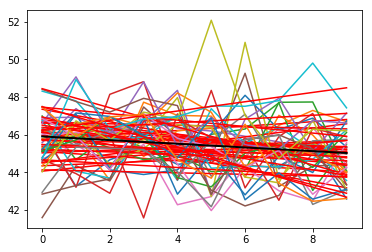

In [20]:
for num_memb in range(len(march_snow_ter)):
    plt.plot(march_april_snow[num_memb,:])
    plt.plot(march_april_snow_ideal[num_memb,:], 'r', label=num_memb)
plt.plot(np.mean(march_april_snow_ideal,axis=0), color='black', linewidth=2)

In [22]:
# We load the data from the piControl run:
data_piControl = np.load('save_snow_piControl_10y_trend.npz')
mu_piControl=data_piControl['mu']
std_piControl=data_piControl['std']

In [23]:
mu_piControl, std_piControl

(array(0.0004719), array(0.16638042))

In [24]:
# We load the NCEP observational datasets
import xarray as xr
file='/home/mmenegoz/travaux_martin/CMIP6-Analysis-CLIMERI-2018119/ref/NH_march_april_snc_mon.ncarcfsr_1979-2016_r360x180.nc'
with xr.open_dataset(file) as ds:
    snc_obs = ds['snowc']
    lat_obs = ds['lat']
    lon_obs = ds['lon']

In [25]:
type(snc_obs), snc_obs.shape, lat_obs.shape, lon_obs.shape

(xarray.core.dataarray.DataArray, (38, 65, 360), (65,), (360,))

In [26]:
weights=np.cos(np.deg2rad(lat_obs))
snc_obs_masked=ma.masked_where(snc_obs == 9999, snc_obs)
zonal_mean=snc_obs_masked.mean(axis=2)
ave_snc_obs = np.average(zonal_mean, axis=1, weights=weights)

In [27]:
first_year_ncar=1979
first_index=first_year-first_year_ncar
second_index=first_index+last_year-first_year+1
obs_period=ave_snc_obs[first_index:second_index]
obs_period.shape

(10,)

In [28]:
obs_stat=stats.linregress(range(obs_period.shape[0]),obs_period[:])
march_april_snow_trend_obs=obs_stat.slope
march_april_snow_trend_obs

0.049259907452895525

In [29]:
# We load NOAA observational dataset:
file='/home/mmenegoz/travaux_martin/CMIP6-Analysis-CLIMERI-2018119/ref/NH_march_april_snowc.mon.noaaV2c_185101_201412_2.0x1.75'
with xr.open_dataset(file) as ds:
    snc_noaa = ds['snowc']
    lat_noaa = ds['lat']
    lon_noaa = ds['lon']

In [30]:
first_year_noaa=1851
first_index_noaa=first_year-first_year_noaa
second_index_noaa=first_index_noaa+last_year-first_year+1
1995-1851, 2014-1851, 165-144
first_index_noaa, second_index_noaa

(154, 164)

In [31]:
1851+144

1995

(<matplotlib.image.AxesImage at 0x2aba152f0ad0>,
 <matplotlib.colorbar.Colorbar at 0x2aba15327c90>)

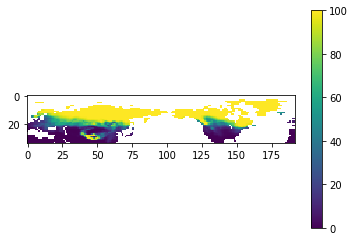

In [32]:
plt.imshow(snc_noaa[0,:,:]), plt.colorbar()

In [33]:
weights_noaa=np.cos(np.deg2rad(lat_noaa))
masked_noaa = ma.masked_array(snc_noaa, np.isnan(snc_noaa))
zonal_mean_noaa=masked_noaa.mean(axis=2)
ave_snc_noaa=np.average(zonal_mean_noaa, axis=1, weights=weights_noaa)
noaa_period=ave_snc_noaa[first_index_noaa:second_index_noaa]

In [34]:
# Rutgers University data
file='/home/mmenegoz/travaux_martin/CMIP6-Analysis-CLIMERI-2018119/ref/Timeseries_snc_rutgers_NH_MarApr_1967-2015.dat'
rutgers = np.loadtxt(file, comments="#", delimiter=" ", unpack=False)

In [35]:
first_year_rutgers=1967
first_index_rutgers=first_year-first_year_rutgers
second_index_rutgers=first_index_rutgers+last_year-first_year+1
first_index_rutgers, second_index_rutgers

(38, 48)

In [36]:
rutgers_period=rutgers[first_index_rutgers:second_index_rutgers]

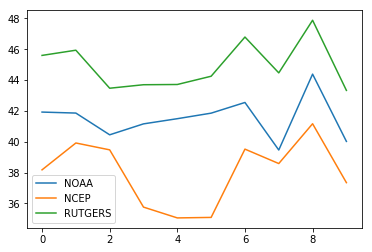

In [37]:
plt.plot(noaa_period, label='NOAA'), plt.plot(obs_period, label='NCEP'); plt.plot(rutgers_period,label='RUTGERS')
plt.legend(loc='lower left')
plt.savefig(period_extract+'_snow_observations_trend'+figure_type)
plt.savefig(period_extract+'_snow_observations_trend'+figure_type2)

In [38]:
rutgers_stat=stats.linregress(range(rutgers_period.shape[0]),rutgers_period[:])
march_april_snow_trend_rutgers=rutgers_stat.slope
march_april_snow_trend_rutgers

0.048315248706124046

In [39]:
noaa_stat=stats.linregress(range(noaa_period.shape[0]),noaa_period[:])
march_april_snow_trend_noaa=noaa_stat.slope
march_april_snow_trend_noaa

0.0009098819916163183

In [40]:
march_april_snow_trend

array([-0.12181988,  0.11683273, -0.07388969, -0.01887681, -0.19284645,
        0.18243693,  0.07411938, -0.21226437, -0.08907529, -0.0306661 ,
        0.23129735, -0.09966546,  0.07431865, -0.13357197, -0.03860661,
       -0.03968719, -0.32821741, -0.03633034, -0.14649085, -0.33328629,
       -0.06701866, -0.17464387, -0.07222521,  0.12805518, -0.17219046,
       -0.50627118, -0.296579  , -0.10240825,  0.09953604,  0.24692612,
       -0.45023106])

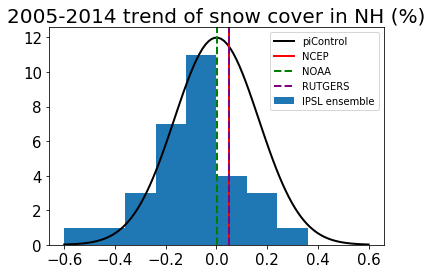

In [41]:
# Plot the histogram
num_memb=len(march_snow_ter)
xmin, xmax=(-0.6,0.6)
plt.hist(march_april_snow_trend, density=False, range=(xmin,xmax), label='IPSL ensemble')
# Plot the PDF from the piControl:
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_piControl, std_piControl)
plt.plot(x, p*5, 'k', linewidth=2, label="piControl") # *11/6 to be justified
plt.axvline(x=march_april_snow_trend_obs, color='r', linestyle='-', linewidth=2, label='NCEP')
plt.axvline(x=march_april_snow_trend_noaa, color='g', linestyle='dashed', linewidth=2, label='NOAA')
plt.axvline(x=march_april_snow_trend_rutgers, color='purple', linestyle='dashed', linewidth=2, label='RUTGERS')
plt.legend(loc='upper right')
title = period_extract+" trend of snow cover in NH (%)"
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(title, fontsize=20)
plt.savefig(period_extract+'_snow_histo_trend'+figure_type)
plt.savefig(period_extract+'_snow_histo_trend'+figure_type2)

In [42]:
np.savez('save_snow_trend.npz', march_april_snow=march_april_snow, \
         march_april_snow_trend=march_april_snow_trend,\
         march_april_snow_ideal=march_april_snow_ideal)

In [43]:
march_april_snow.shape, march_april_snow_trend.shape

((31, 10), (31,))

In [44]:
march_snow_2D=cMA(march_snow)
april_snow_2D=cMA(april_snow)

In [45]:
%run -i 'standard_operators.py'

<Figure size 432x288 with 0 Axes>

In [46]:
march_snow_2D['r10i1p1f1'].shape[1:3], len(march_snow_2D)
lat_length=march_snow_2D["r1i1p1f1"].shape[1]
lon_length=march_snow_2D["r1i1p1f1"].shape[2]
ens_length=len(march_snow_2D)
nb_years=march_snow_2D["r1i1p1f1"].shape[0]
ens_length,lon_length,lat_length,march_snow_2D["r1i1p1f1"].shape

(31, 144, 52, (10, 52, 144))

In [47]:
march_snow_2D['r10i1p1f1'].shape, np.ma.getmask(march_snow_2D['r1i1p1f1']).shape

((10, 52, 144), (10, 52, 144))

In [48]:
#Spatial trends, initializing march-april arrays
march_april_snow_2D_trend=np.full([ens_length,lat_length,lon_length],np.nan)
march_april_snow_2D_pvalue=np.full([ens_length,lat_length,lon_length],np.nan)

In [49]:
march_snow_2D["r1i1p1f1"].shape,march_april_snow_2D_pvalue.shape

((10, 52, 144), (31, 52, 144))

In [50]:
# Compute the spatial trend
for num_memb in range(len(march_snow_ter)):
    memb="r"+str(num_memb+1)+"i1p1f1"
    print(memb)
    tmp=np.stack((march_snow_2D[memb],april_snow_2D[memb]),axis=0)
    march_april_snow_memb=np.average(tmp,axis=0)
    for ji in range(lat_length):
        for jj in range(lon_length):
            tmp_stat=stats.linregress(range(march_april_snow_memb.shape[0]),march_april_snow_memb[:,ji,jj])
            march_april_snow_2D_trend[num_memb,ji,jj]=tmp_stat.slope
            march_april_snow_2D_pvalue[num_memb,ji,jj]=tmp_stat.pvalue

r1i1p1f1
r2i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r30i1p1f1
r31i1p1f1


In [51]:
# Mean trend for all the members
march_april_snow_2D_trend_ensmean=np.mean(march_april_snow_2D_trend,axis=0)

In [52]:
# We get the lat/lon to produce the plots with basemap
import xarray as xr
file='/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/LImon/snc/gr/latest/snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
with xr.open_dataset(file) as ds:
    latitudes = ds['lat']
    longitudes = ds['lon']

In [53]:
march_april_snow_2D_trend_ensmean.shape, longitudes.shape, latitudes.shape

((52, 144), (144,), (143,))

In [54]:
# Compute the member mean (climatology)
snow_spatial_mean_r1=np.mean(march_snow_2D['r1i1p1f1'],axis=0)
sum_members=np.ma.array(np.zeros(snow_spatial_mean_r1.shape),\
                        mask=np.ma.getmask(snow_spatial_mean_r1))
for num_memb in range(len(march_snow_ter)):
    memb="r"+str(num_memb+1)+"i1p1f1"
    print(memb)
    tmp=np.stack((march_snow_2D[memb],april_snow_2D[memb]),axis=0)
    march_april_snow_memb=np.average(tmp,axis=0)
    sum_members=np.mean(march_april_snow_memb,axis=0)+sum_members
clim_march_snow_2D=sum_members/len(march_snow_ter)

r1i1p1f1
r2i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1
r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r30i1p1f1
r31i1p1f1


In [55]:
np.savez('save_snow_trend_2D.npz', march_april_snow_2D_pvalue=march_april_snow_2D_pvalue,\
         march_april_snow_2D_trend=march_april_snow_2D_trend,\
         latitudes=latitudes, longitudes=longitudes)

In [56]:
type(march_april_snow_2D_trend), march_april_snow_2D_trend.shape

(numpy.ndarray, (31, 52, 144))

In [57]:
# We use only the NH data
latitudes_NH=latitudes[latitudes>25]

In [58]:
# Save the data in a netcdf file
MA_snow_trend = xr.Dataset({'march_april_snow_2D_trend_ensmean':(['y','x'],np.array(march_april_snow_2D_trend_ensmean)),\
                           'lon':(['x'],np.array(longitudes)),\
                           'lat':(['y'],np.array(latitudes_NH))})
MA_snow_trend.to_netcdf('MA_snow_trend_'+period_extract+'.nc')

In [59]:
from   mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as     bm

In [60]:
# We exclude the trend where there is no snow and where the snow data is masked:
snow_spatial_mean_r1=np.mean(march_snow_2D['r1i1p1f1'],axis=0)
march_april_snow_2D_trend_ensmean[(snow_spatial_mean_r1<=1)]=np.nan
march_april_snow_2D_trend_ensmean[np.ma.getmask(snow_spatial_mean_r1)==True]=np.nan

In [61]:
# Variables to map
var1=clim_march_snow_2D
var2=march_april_snow_2D_trend_ensmean
# We shift the longitudes
lon,lon = bm.shiftgrid(180., longitudes,  np.array(longitudes), start=False)
# Expand to a 2-D grid
lon, lat = np.meshgrid(lon, np.array(latitudes_NH))

In [62]:
m = Basemap(resolution='l',projection='cyl',\
            llcrnrlon=-180,llcrnrlat=25.,urcrnrlon=180,urcrnrlat=90,\
            lat_0=30.,lon_0=0.)
x, y = m(lon, lat)

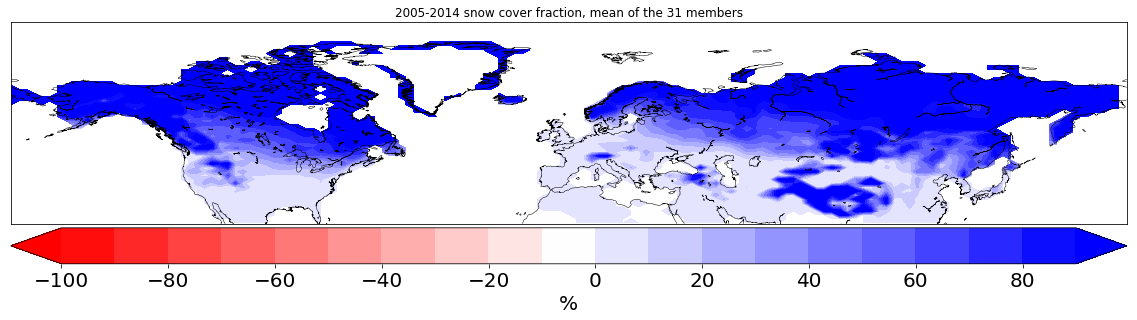

In [63]:
plt.figure(figsize=(20,10))
m.drawcoastlines(linewidth = 0.5)
clevs = np.arange(-100, 100, 10)
cf = m.contourf(x, y, var1, latlon = False,\
                cmap = plt.cm.bwr_r, extend = "both", levels = clevs)
cbar = m.colorbar(cf, location = 'bottom',size=0.5)
cbar.set_label("%",fontsize=20)
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), fontsize=20)
plt.title(period_extract+' snow cover fraction, mean of the 31 members')
#plt.savefig(period_extract+'snow_trend.ps')
plt.show()

/prodigfs/ipslfs/dods/jservon/miniconda/envs/cesmep_env/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/prodigfs/ipslfs/dods/jservon/miniconda/envs/cesmep_env/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linestyle', 'label'
  s)


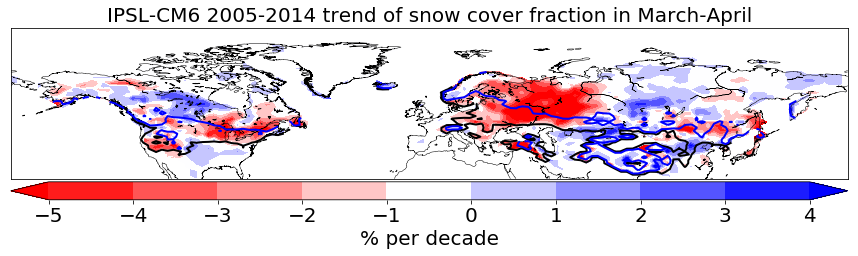

In [64]:
plt.figure(figsize=(15,15))
m.drawcoastlines(linewidth = 0.5)
clevs = np.arange(-5, 5, 1)
clev_clim_10=10
clev_clim_50=50
cf = m.contourf(x, y, 10*var2, latlon = False,\
                cmap = plt.cm.bwr_r, extend = "both", levels = clevs)
cbar = m.colorbar(cf, location = 'bottom',size=0.25)
cf = m.contour(x,y,var1,linewidths=2,colors='black',levels=clev_clim_10,label='10% level')
cf = m.contour(x,y,var1,linewidths=2,colors='blue',levels=clev_clim_50,linestyle='dotted',label='50% level')
cbar.set_label("% per decade",fontsize=20)
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), fontsize=20)
plt.title('IPSL-CM6 '+period_extract+' trend of snow cover fraction in March-April',fontsize=20)
#plt.legend(loc='upper right')
plt.savefig(period_extract+'_snow_trend'+figure_type)
plt.savefig(period_extract+'_snow_trend'+figure_type2)